Restaurant Food Cost

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [3]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
#checking the missing value
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

here we observe city ,locatity , ratings and cost  column have a null values

In [6]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

<Axes: >

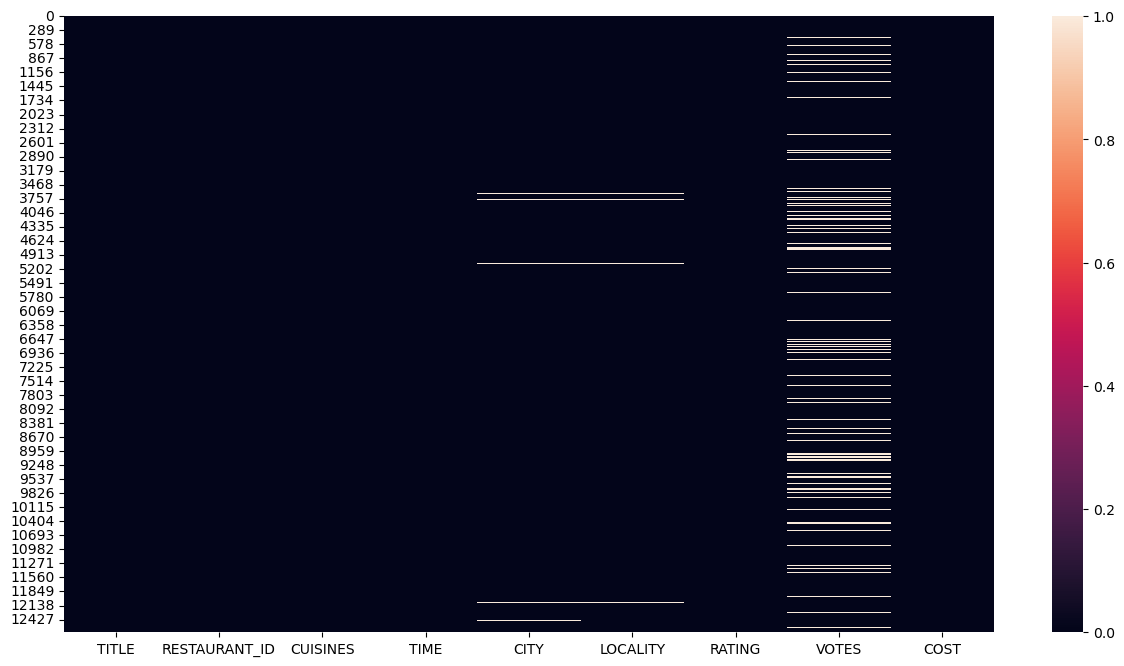

In [7]:
#Now we observe that there are in many columns has null values now take a look of it in heat map.
plt.figure(figsize=(15,8))
sns.heatmap(train.isnull())

<Axes: >

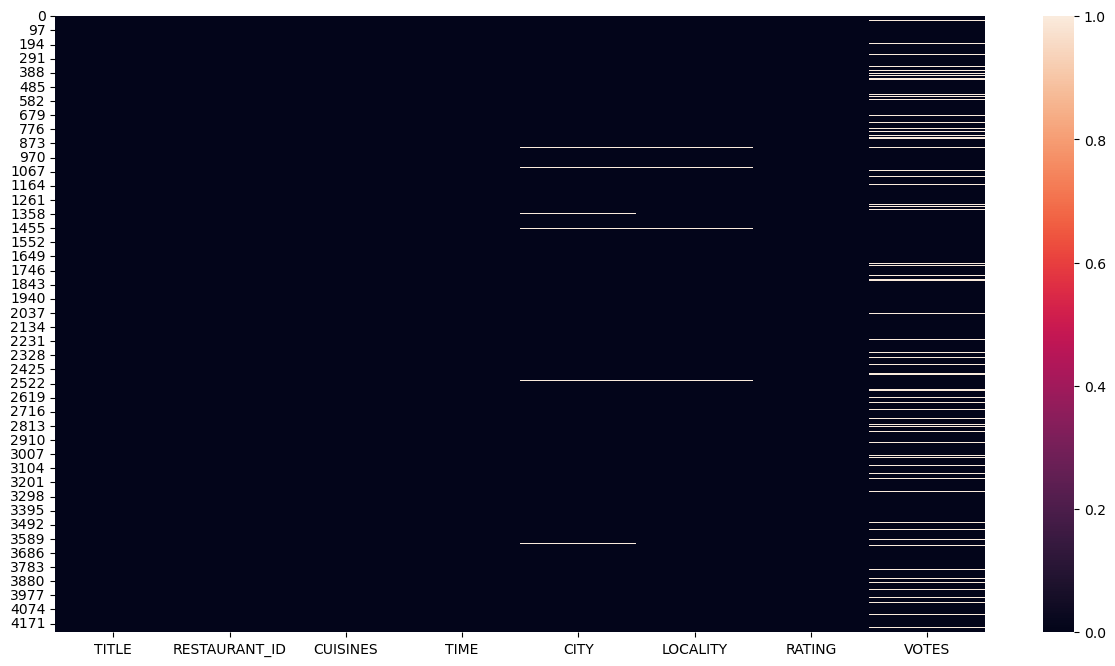

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(test.isnull())

In [9]:
print(train['TITLE'].nunique())
print(train['RESTAURANT_ID'].nunique())
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

113
11892
4155
2689
359
1416
32
1847


In [10]:
train['CITY'].value_counts()

Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: CITY, Length: 359, dtype: int64

<Axes: xlabel='RATING'>

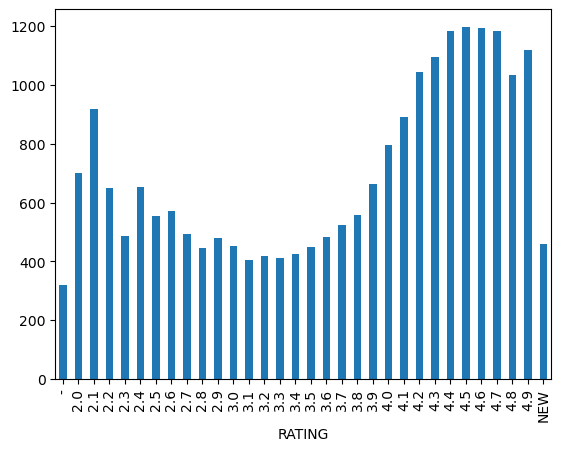

In [11]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<Axes: xlabel='RATING'>

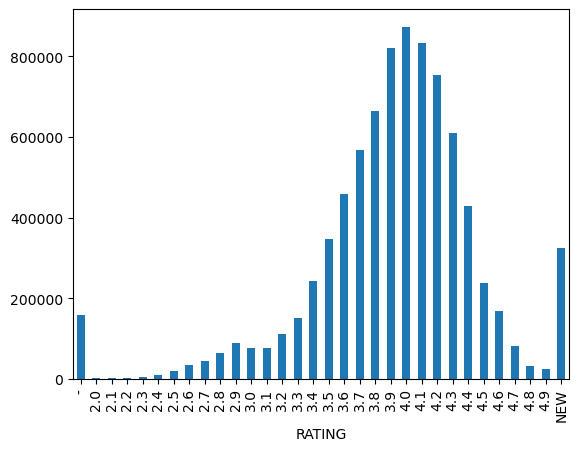

In [12]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [13]:
#for city column of train data
train['CITY'].value_counts()

Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: CITY, Length: 359, dtype: int64

In [14]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [15]:
train[train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [16]:
train[train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [17]:
# # replace the rating for train dataset
train['RATING'] = train['RATING'].astype('object')
# for test  dataset
test['RATING'] = test['RATING'].astype('object') 

In [18]:
# replace the rating for train dataset
train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) 
#  # replace the rating for test dataset
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0})

In [19]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [20]:
#convert ratings to float datatype
# for train set
train['RATING'] = train['RATING'].astype(float) 
# for test set
test['RATING'] = test['RATING'].astype(float) 

joining the data

In [21]:
train['source']= 'train'
test['source'] = 'test'

In [22]:
data=pd.concat([train, test],ignore_index=True)

In [23]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [24]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True) 
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165,votes


# fillling missing value

In [25]:
# filling with mode
data['VOTES'] = data['VOTES'].fillna(44.0) 

In [26]:
# filling with the median
data['RATING'] = data['RATING'].fillna(3.8) 

In [27]:
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')


In [28]:
data['CITY'] = data['CITY'].fillna('Chennai')

In [29]:
data = data.drop(['VOTES', 'votes'], axis=1)

feature engineering

In [30]:
data['title_rat'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].mean())
data['title_rat_C'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].count())
data['city_rat'] = data['CITY'].map(data.groupby('CITY')['RATING'].mean())
data['city_rat_C'] = data['CITY'].map(data.groupby('CITY')['RATING'].count())
data['cuisine_rat'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].mean())
data['cuisine_rat_C'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].count())

In [31]:
data['rest_id'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['RATING'].count())
data['rest_id_votes'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['votes_no'].count())

In [32]:
data['title_rat_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['title_rat_C_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['city_rat_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['city_rat_C_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['cuisine_rat_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())
data['cuisine_rat_C_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())

In [103]:
# Check data types of the columns
print(data.dtypes)

# Convert 'RATING' column to numeric (if necessary)
data['RATING'] = pd.to_numeric(data['RATING'], errors='coerce')

# Convert 'votes_no' column to numeric (if necessary)
data['votes_no'] = pd.to_numeric(data['votes_no'], errors='coerce')

# Check for missing values
print(data.isna().sum())

# Handle missing values (if present)
# For example, you can use fillna() to replace missing values with a specific value

# Perform the multiplication operation
data['rat_vote'] = data['RATING'] * data['votes_no']

TITLE                  int32
RESTAURANT_ID          int64
CUISINES               int32
TIME                   int32
CITY                   int32
LOCALITY               int32
RATING               float64
COST                 float64
source                object
votes_no              object
title_rat            float64
title_rat_C            int64
city_rat             float64
city_rat_C             int64
cuisine_rat          float64
cuisine_rat_C          int64
rest_id                int64
rest_id_votes          int64
title_rat_sum        float64
title_rat_C_sum      float64
city_rat_sum         float64
city_rat_C_sum       float64
cuisine_rat_sum      float64
cuisine_rat_C_sum    float64
dtype: object
TITLE                   0
RESTAURANT_ID           0
CUISINES                0
TIME                    0
CITY                    0
LOCALITY                0
RATING                  0
COST                 4231
source                  0
votes_no             1606
title_rat               0
titl

converison of data /data preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 24)


In [35]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no,...,cuisine_rat,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum
0,34,9438,3294,898,400,328,3.6,1200.0,train,49,...,3.600000,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30,...,4.200000,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2
2,34,10915,3729,806,75,1272,3.8,800.0,train,221,...,3.650000,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6
3,104,6346,5156,340,277,161,4.1,800.0,train,24,...,4.066667,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2
4,55,15387,2218,750,277,709,3.8,300.0,train,165,...,3.479487,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1


In [36]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [37]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

In [38]:
Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no,title_rat,...,cuisine_rat,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum
0,34,9438,3294,898,400,328,3.6,1200.0,49,3.651487,...,3.600000,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6
1,36,13198,364,2301,75,1214,4.2,1500.0,30,4.098920,...,4.200000,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2
2,34,10915,3729,806,75,1272,3.8,800.0,221,3.651487,...,3.650000,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6
3,104,6346,5156,340,277,161,4.1,800.0,24,3.589670,...,4.066667,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2
4,55,15387,2218,750,277,709,3.8,300.0,165,3.717717,...,3.479487,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1


In [39]:
Test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,votes_no,title_rat,title_rat_C,...,cuisine_rat,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum
12690,34,4085,3878,1417,323,1314,4.3,564,3.651487,4910,...,4.150000,2,1,1,17928.8,17928.8,1115.9,1115.9,8.3,8.3
12691,104,12680,4879,2548,277,429,4.2,61,3.589670,5634,...,4.200000,1,1,1,20224.2,20224.2,9289.8,9289.8,4.2,4.2
12692,34,1411,4333,614,277,774,3.8,350,3.651487,4910,...,3.800000,1,1,1,17928.8,17928.8,9289.8,9289.8,3.8,3.8
12693,95,204,631,2955,128,846,3.8,1445,3.895726,1287,...,3.573171,164,1,1,5013.8,5013.8,423.9,423.9,586.0,586.0
12694,104,13453,4891,586,216,570,3.6,23,3.589670,5634,...,3.153125,32,1,1,20224.2,20224.2,4194.4,4194.4,100.9,100.9


In [42]:
X = Train.drop('COST', axis=1)
y = Train['COST']


In [54]:
y=pd.DataFrame(data=y)

In [55]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (10152, 22)
Shape of y_train: (10152,)


In [56]:
print("Data type of X_train:", type(X_train))
print("Data type of y_train:", type(y_train))

Data type of X_train: <class 'pandas.core.frame.DataFrame'>
Data type of y_train: <class 'pandas.core.series.Series'>


In [44]:

# target = train['COST']
# train = train.drop('COST', axis=1)

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Assuming you have already defined your features X and target y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of Ridge regression model
ridge = Ridge()

# Fit the model on the imputed training data
ridge.fit(X_train_imputed, y_train)

# Evaluate the model on the imputed testing data
score = ridge.score(X_test_imputed, y_test)
print("Ridge Regression Score:", score)

pred = ridge.predict(X_test_imputed)

# Display the predictions
print(pred)

Ridge Regression Score: 0.38959843055942833
[[ 469.70903774]
 [ 512.34510215]
 [1663.02322058]
 ...
 [ 378.19417926]
 [ 431.40262136]
 [1140.59821713]]


In [65]:
# Check the columns of x_test to ensure they match the training data
print("Columns of x_test:", x_test.columns)

# Impute missing values in x_test if needed
x_test_imputed = imputer.transform(x_test)  # Assuming 'imputer' was defined previously

# Make predictions on the imputed x_test data
test_pred = ridge.predict(x_test_imputed)

# Converting price back to original scale and making it integer
Predict = np.exp(test_pred)

# Display the predictions
print(Predict)

Columns of x_test: Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'votes_no', 'title_rat', 'title_rat_C', 'city_rat',
       'city_rat_C', 'cuisine_rat', 'cuisine_rat_C', 'rest_id',
       'rest_id_votes', 'title_rat_sum', 'title_rat_C_sum', 'city_rat_sum',
       'city_rat_C_sum', 'cuisine_rat_sum', 'cuisine_rat_C_sum'],
      dtype='object')
[[            inf]
 [1.64081187e+261]
 [            inf]
 ...
 [6.88436875e+190]
 [2.21476615e+079]
 [3.17621451e+172]]


In [66]:
a =pd.DataFrame(Predict, columns=['COST'])

In [67]:
a

,COST
0,inf
1,1.640812e+261
2,inf
3,2.059977e+284
4,3.050404e+153
...,...
4226,inf
4227,5.938926e+275
4228,6.884369e+190
4229,2.214766e+79


In [69]:
a.to_excel('cost1.xlsx')

# xgboost

In [70]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Ensure that the result is a DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Now you can proceed to fit your XGBoost model
xg.fit(X_train_imputed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
# Make predictions on the imputed X_test data
preds = xg.predict(X_test_imputed)

# Display the predictions
print(preds)

[383.36673 430.1488  804.3454  ... 382.72156 292.48386 762.2729 ]


In [75]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import numpy as np

# Assuming you have defined your feature matrix X and target vector y

# Impute missing values in X if needed
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Create an instance of XGBRegressor
xgs = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=200, random_state=1994)

# Fit the model on the training data
xgs.fit(X_imputed, y)

# Make predictions on the entire dataset X
preds = xgs.predict(X_imputed)


In [79]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, log_loss
print(np.sqrt(mean_squared_error(preds, y)))

140.3486640747179


In [80]:
preds

array([ 928.65155, 1539.3912 ,  690.09766, ..., 1389.0931 ,  597.24677,
        616.5216 ], dtype=float32)

In [82]:
# Impute missing values in Test if needed
imputer = SimpleImputer(strategy='mean')
Test_imputed = imputer.fit_transform(Test)

# Make predictions on the imputed Test data
test_predss = xgs.predict(Test_imputed)

# Display the predictions
print(test_predss)

[1250.452    484.9508   712.7015  ...  354.25864  337.49167  348.1403 ]


In [83]:

# Converting price back to original scale and making it integer
Predicted=np.exp(test_predss)
Predicted=Predicted.astype(int)
abc =pd.DataFrame(Predicted, columns=['COST'])
abc

,COST
0,-2147483648
1,-2147483648
2,-2147483648
3,-2147483648
4,-2147483648
...,...
4226,-2147483648
4227,-2147483648
4228,-2147483648
4229,-2147483648


In [84]:
abc.to_excel('cost90.xlsx')

In [85]:
preds

array([ 928.65155, 1539.3912 ,  690.09766, ..., 1389.0931 ,  597.24677,
        616.5216 ], dtype=float32)

In [87]:
# Impute missing values in x_test if needed
imputer = SimpleImputer(strategy='mean')
x_test_imputed = imputer.fit_transform(x_test)

# Make predictions on the imputed x_test data
test_preds = xg.predict(x_test_imputed)

# Display the predictions
print(test_preds)

[1289.6095   473.4125   694.5022  ...  582.68463  375.999    338.0859 ]


In [88]:
# Converting price back to original scale and making it integer
Predicts=np.exp(test_preds)
Predicts=Predicts.astype(int)
ab =pd.DataFrame(Predicts, columns=['COST'])
ab

,COST
0,-2147483648
1,-2147483648
2,-2147483648
3,-2147483648
4,-2147483648
...,...
4226,-2147483648
4227,-2147483648
4228,-2147483648
4229,-2147483648


In [89]:
ab.to_excel('cost2.xlsx')